In [6]:
#conda install requests beautifulsoup4 -y


Jupyter detected...
2 channel Terms of Service accepted
doneieving notices: - 
Channels:
 - defaults
Platform: osx-arm64
doneecting package metadata (repodata.json): / 
doneing environment: | 

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - beautifulsoup4
    - requests


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.13.5      |  py313hca03da5_0         264 KB
    certifi-2025.10.5          |  py313hca03da5_0         157 KB
    openssl-3.0.18             |       h9b4081a_0         3.1 MB
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following packages will be UPDATED:

  beautifulsoup4                     4.12.3-py313hca03da5_0 --> 4.13.5-py313hca03da5_0 
  certifi                          2025.8.3-py313hca03da5_0 --> 2025.10.5-py313hca03

In [29]:
!pip install pandas numpy matplotlib seaborn plotly networkx python-louvain


     ---------------------------------------- 0.0/204.6 kB ? eta -:--:--
     -- ------------------------------------- 10.2/204.6 kB ? eta -:--:--
     ------- ----------------------------- 41.0/204.6 kB 393.8 kB/s eta 0:00:01
     ------------------- ---------------- 112.6/204.6 kB 819.2 kB/s eta 0:00:01
     ------------------------------ ----- 174.1/204.6 kB 876.1 kB/s eta 0:00:01
     ------------------------------------ 204.6/204.6 kB 957.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9403 sha256=c91972157cd24bbce9ed320bc10083c754de8b8054277ed937a59c450bb2bbb9
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\40\f1\e3\485b698c520fa0baee1d07897abc7b8d6479b7d199ce96f4af
Successfully built python-louvain


In [1]:
"""""
User-Agent: *
Disallow: /m/
Disallow: /me/
Disallow: /@me$
Disallow: /@me/
Disallow: /*/edit$
Disallow: /*/*/edit$
Disallow: /media/
Disallow: /p/*/share
Disallow: /r/
Disallow: /trending
Disallow: /search?q$
Disallow: /search?q=
Disallow: /*/search?q=
Disallow: /*/search/*?q=
Disallow: /*/*source=
Allow: /_/api/users/*/meta
Allow: /_/api/users/*/profile/stream
Allow: /_/api/posts/*/responses
Allow: /_/api/posts/*/responsesStream
Allow: /_/api/posts/*/related
User-Agent: Amazonbot
User-Agent: Applebot-Extended
User-Agent: Bytespider
User-Agent: ClaudeBot
User-Agent: FacebookBot
User-Agent: GoogleOther
User-Agent: GPTBot
User-Agent: meta-externalagent
Disallow: /
Allow: /about
Allow: /business
Allow: /earn
Allow: /gift
Allow: /membership
Allow: /partner-program
Allow: /verified-authors
Sitemap: https://netflixtechblog.com/sitemap/sitemap.xml
License: https://medium.com/license.xml
"""""

import requests
from bs4 import BeautifulSoup
import urllib3
import pandas as pd

# 忽略 SSL 警告
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

# 取得 sitemap
sitemap_url = "https://netflixtechblog.com/sitemap/sitemap.xml"
response = requests.get(sitemap_url, verify=False)
soup = BeautifulSoup(response.content, "lxml-xml")

# 解析 <url> 標籤
urls = []
for url_tag in soup.find_all("url"):
    loc = url_tag.find("loc").text
    lastmod_tag = url_tag.find("lastmod")
    lastmod = lastmod_tag.text if lastmod_tag else None
    changefreq_tag = url_tag.find("changefreq")
    changefreq = changefreq_tag.text if changefreq_tag else None
    priority_tag = url_tag.find("priority")
    priority = priority_tag.text if priority_tag else None
    urls.append({
        "loc": loc,
        "lastmod": lastmod,
        "changefreq": changefreq,
        "priority": priority
    })

# 轉成 DataFrame
df = pd.DataFrame(urls)

# 存 CSV
df.to_csv("netflix_techblog_sitemap.csv", index=False, encoding="utf-8-sig")

print("CSV 檔案已儲存！")
print(df.head(10))


CSV 檔案已儲存！
                                                 loc     lastmod changefreq  \
0    https://netflixtechblog.com/tagged/career-paths  2021-05-28    monthly   
1        https://netflixtechblog.com/tagged/academia  2021-05-28    monthly   
2          https://netflixtechblog.com/tagged/netfli  2021-05-28    monthly   
3  https://netflixtechblog.com/my-seemingly-rando...  2021-05-28    monthly   
4  https://netflixtechblog.com/migrating-netflix-...  2023-06-14    monthly   
5  https://netflixtechblog.com/tagged/information...  2023-06-12    monthly   
6           https://netflixtechblog.com/tagged/apple  2023-06-12    monthly   
7             https://netflixtechblog.com/tagged/mac  2023-06-12    monthly   
8             https://netflixtechblog.com/tagged/mdm  2023-06-12    monthly   
9  https://netflixtechblog.com/escrow-buddy-an-op...  2023-06-12    monthly   

  priority  
0      1.0  
1      1.0  
2      1.0  
3      1.0  
4      1.0  
5      1.0  
6      1.0  
7      1.0  
8 

In [16]:
import pandas as pd

# 讀取原始 CSV
df = pd.read_csv("netflix_techblog_sitemap.csv", encoding="utf-8-sig")

# 1. 去掉網域（https://netflixtechblog.com 或 https://netflixtechblog.com/）
df["loc"] = df["loc"].str.replace(r"^https://netflixtechblog.com/?", "", regex=True)

# 2. 刪掉空白 loc 的觀察值
df = df[df["loc"].str.strip() != ""]

# 3. 計算每個 loc 中 '/' 的數量，找最大層級
df["slash_count"] = df["loc"].str.count("/")
max_slash = df["slash_count"].max()
print(f"最大層級數: {max_slash}")

# 4. 拆分 loc 為 level 欄位
split_cols = [f"level_{i+1}" for i in range(max_slash + 1)]
df[split_cols] = df["loc"].str.split("/", expand=True)

# 5. 移除暫時的 slash_count
df = df.drop(columns=["slash_count"])

# 6. 保留最後需要的欄位順序（loc、lastmod、level_1、level_2…）
cols = ["loc", "lastmod"] + split_cols
df = df[cols]

# 7. 存成 CSV
df.to_csv("netflix_techblog_sitemap_split_clean.csv", index=False, encoding="utf-8-sig")

print("已清理並拆層級，存成 netflix_techblog_sitemap_split_clean.csv")
print(df.head(10))


最大層級數: 1
已清理並拆層級，存成 netflix_techblog_sitemap_split_clean.csv
                                                 loc     lastmod  \
0  fm-intent-predicting-user-session-intent-with-...  2025-05-21   
1  unbundling-data-science-workflows-with-metaflo...  2020-07-29   
2                      tagged/developer-productivity  2021-04-26   
3                             tagged/neural-networks  2022-11-14   
4  machine-learning-for-a-better-developer-experi...  2020-07-28   
5  rebuilding-netflix-video-processing-pipeline-w...  2024-01-10   
6                                     tagged/network  2024-04-24   
7                                         tagged/tcp  2024-04-24   
8                                      tagged/kernel  2024-04-24   
9  investigation-of-a-cross-regional-network-perf...  2024-04-24   

                                             level_1                 level_2  
0  fm-intent-predicting-user-session-intent-with-...                    None  
1  unbundling-data-science-workf

In [17]:
import pandas as pd

# 讀取剛剛清理後的檔案
df = pd.read_csv("netflix_techblog_sitemap_split_clean.csv", encoding="utf-8-sig")

# 檢查欄位
print(df.columns)

# 拆分成兩個 DataFrame
df_tagged = df[df["level_1"] == "tagged"].copy()
df_non_tagged = df[df["level_1"] != "tagged"].copy()

# 分別輸出成 CSV
df_tagged.to_csv("netflix_techblog_tagged.csv", index=False, encoding="utf-8-sig")
df_non_tagged.to_csv("netflix_techblog_non_tagged.csv", index=False, encoding="utf-8-sig")

print(f"已拆分完成：")
print(f"  tagged 共有 {len(df_tagged)} 筆")
print(f"  非 tagged 共有 {len(df_non_tagged)} 筆")


Index(['loc', 'lastmod', 'level_1', 'level_2'], dtype='object')
已拆分完成：
  tagged 共有 742 筆
  非 tagged 共有 214 筆


In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
import random
import urllib3

# 關閉 SSL 驗證警告
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

# === 1. 匯入 CSV ===
df_tags = pd.read_csv("netflix_techblog_tagged.csv")
df_tags["tag_url"] = "https://netflixtechblog.com/" + df_tags["loc"]
df_tags["tag"] = df_tags["level_2"]

# 用 dict 暫存文章 -> tags
articles_dict = {}

# === 2. 定義爬蟲函數 ===
def fetch_tag_articles(tag_url, tag):
    """從單一 tag 頁面提取所有 data-href"""
    headers = {
        "User-Agent": random.choice([
            "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 Chrome/120.0.0.0 Safari/537.36",
            "Mozilla/5.0 (Macintosh; Intel Mac OS X 13_0) AppleWebKit/537.36 Chrome/120.0.0.0 Safari/537.36"
        ]),
        "Accept-Language": "en-US,en;q=0.9"
    }

    print(f"爬取中: {tag_url}")
    try:
        resp = requests.get(tag_url, headers=headers, verify=False, timeout=10)
    except Exception as e:
        print(f"❌ {tag_url} 請求失敗: {e}")
        return []

    if resp.status_code != 200:
        print(f"⚠️ {tag_url} 狀態碼 {resp.status_code}")
        return []

    soup = BeautifulSoup(resp.text, "html.parser")
    articles = []
    for card in soup.select("div[data-href]"):
        href = card.get("data-href")
        if href:
            articles.append(href.strip())
    time.sleep(0.2)  # 隨機延遲
    return articles

# === 3. 主爬蟲迴圈 ===
for i, row in df_tags.iterrows():
    tag = row["tag"]
    tag_url = row["tag_url"]
    try:
        article_urls = fetch_tag_articles(tag_url, tag)
        for url in article_urls:
            if url not in articles_dict:
                articles_dict[url] = [tag]  # 新文章 -> 新 list
            else:
                articles_dict[url].append(tag)  # 已有文章 -> append tag
        print(f"✅ {tag} 共抓到 {len(article_urls)} 篇文章")
    except Exception as e:
        print(f"⚠️ {tag} 發生錯誤: {e}")

# === 4. 轉成 DataFrame ===
articles_df = pd.DataFrame([
    {"article_url": url, "tags": ",".join(tags)}
    for url, tags in articles_dict.items()
])

# === 5. 儲存 CSV ===
articles_df.to_csv("netflix_techblog_articles.csv", index=False, encoding="utf-8-sig")
print(f"✅ 完成！共 {len(articles_df)} 筆文章連結。")


爬取中: https://netflixtechblog.com/tagged/developer-productivity
✅ developer-productivity 共抓到 2 篇文章
爬取中: https://netflixtechblog.com/tagged/neural-networks
✅ neural-networks 共抓到 2 篇文章
爬取中: https://netflixtechblog.com/tagged/network
✅ network 共抓到 1 篇文章
爬取中: https://netflixtechblog.com/tagged/tcp
✅ tcp 共抓到 1 篇文章
爬取中: https://netflixtechblog.com/tagged/kernel
✅ kernel 共抓到 1 篇文章
爬取中: https://netflixtechblog.com/tagged/artificial-intelligence
✅ artificial-intelligence 共抓到 1 篇文章
爬取中: https://netflixtechblog.com/tagged/payment-processing
✅ payment-processing 共抓到 1 篇文章
爬取中: https://netflixtechblog.com/tagged/ml-explainability
✅ ml-explainability 共抓到 1 篇文章
爬取中: https://netflixtechblog.com/tagged/ml-observability
✅ ml-observability 共抓到 1 篇文章
爬取中: https://netflixtechblog.com/tagged/system-design-concepts
✅ system-design-concepts 共抓到 1 篇文章
爬取中: https://netflixtechblog.com/tagged/foundation-models
✅ foundation-models 共抓到 2 篇文章
爬取中: https://netflixtechblog.com/tagged/intelligibility
✅ intelligibility 

In [23]:
import pandas as pd
import requests
import time
import random
import urllib3
import json

# 關閉 SSL 驗證警告
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

# === 1. 匯入 CSV ===
df_tags = pd.read_csv("netflix_techblog_tagged.csv")
df_tags["tag_url"] = "https://netflixtechblog.com/" + df_tags["loc"]
df_tags["tag"] = df_tags["level_2"]

# 用 dict 暫存文章 -> tags
articles_dict = {}

# === 2. GraphQL API 設定 ===
GRAPHQL_URL = "https://medium.com/_/graphql"

def get_graphql_payload(tag_slug, after_cursor=None):
    """建立 GraphQL query payload"""
    variables = {
        "ref": {
            "slug": None,
            "domain": "netflixtechblog.com"
        },
        "first": 25,  # 每次抓取 25 篇
        "after": after_cursor if after_cursor else "",
        "orderBy": {"publishedAt": "DESC"},
        "filter": {
            "tags": [tag_slug],
            "published": True
        }
    }
    
    query = """
    query PublicationContentDataQuery($ref: PublicationRef!, $first: Int!, $after: String!, $orderBy: PublicationPostsOrderBy, $filter: PublicationPostsFilter) {
      publication: publicationByRef(ref: $ref) {
        id
        publicationPostsConnection(
          first: $first
          after: $after
          orderBy: $orderBy
          filter: $filter
        ) {
          edges {
            listedAt
            node {
              id
              uniqueSlug
              mediumUrl
              title
            }
          }
          pageInfo {
            endCursor
            hasNextPage
          }
        }
      }
    }
    """
    
    return [{
        "operationName": "PublicationContentDataQuery",
        "variables": variables,
        "query": query
    }]

def fetch_tag_articles_graphql(tag_slug):
    """使用 GraphQL API 抓取標籤下的所有文章"""
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 Chrome/120.0.0.0 Safari/537.36",
        "Accept": "*/*",
        "Accept-Language": "en-US,en;q=0.9",
        "Content-Type": "application/json",
        "Origin": "https://netflixtechblog.com",
        "Referer": f"https://netflixtechblog.com/tagged/{tag_slug}"
    }
    
    all_articles = []
    after_cursor = None
    page = 1
    
    while True:
        print(f"  📄 正在抓取第 {page} 頁...")
        
        payload = get_graphql_payload(tag_slug, after_cursor)
        
        try:
            resp = requests.post(
                GRAPHQL_URL,
                json=payload,
                headers=headers,
                verify=False,
                timeout=15
            )
            
            if resp.status_code != 200:
                print(f"  ⚠️ API 回應狀態碼: {resp.status_code}")
                break
            
            data = resp.json()
            
            # 檢查資料結構
            if not data or len(data) == 0:
                print(f"  ⚠️ 無法取得資料")
                break
                
            pub_data = data[0].get("data", {}).get("publication", {})
            connection = pub_data.get("publicationPostsConnection", {})
            edges = connection.get("edges", [])
            page_info = connection.get("pageInfo", {})
            
            # 提取文章 URL
            for edge in edges:
                node = edge.get("node", {})
                medium_url = node.get("mediumUrl", "")
                if medium_url:
                    all_articles.append(medium_url)
            
            print(f"  ✅ 第 {page} 頁抓到 {len(edges)} 篇文章")
            
            # 檢查是否還有下一頁
            has_next = page_info.get("hasNextPage", False)
            if not has_next:
                print(f"  ℹ️ 已到達最後一頁")
                break
            
            after_cursor = page_info.get("endCursor")
            if not after_cursor:
                break
                
            page += 1
            time.sleep(random.uniform(0.5, 1.0))  # 隨機延遲
            
        except Exception as e:
            print(f"  ❌ 請求失敗: {e}")
            break
    
    return all_articles

# === 3. 主爬蟲迴圈 ===
total_tags = len(df_tags)
for i, row in df_tags.iterrows():
    tag = row["tag"]
    print(f"\n[{i+1}/{total_tags}] 🏷️  標籤: {tag}")
    
    try:
        article_urls = fetch_tag_articles_graphql(tag)
        
        for url in article_urls:
            if url not in articles_dict:
                articles_dict[url] = [tag]
            else:
                if tag not in articles_dict[url]:  # 避免重複標籤
                    articles_dict[url].append(tag)
        
        print(f"✅ {tag} 共抓到 {len(article_urls)} 篇文章（累計 {len(articles_dict)} 篇不重複文章）")
        
    except Exception as e:
        print(f"⚠️ {tag} 發生錯誤: {e}")
    
    # 標籤之間的延遲
    if i < total_tags - 1:
        time.sleep(random.uniform(1.0, 2.0))

# === 4. 轉成 DataFrame ===
articles_df = pd.DataFrame([
    {
        "article_url": url,
        "tags": ",".join(sorted(tags)),  # 排序標籤
        "tag_count": len(tags)
    }
    for url, tags in articles_dict.items()
])

# 按標籤數量排序（越多標籤的文章越靠前）
articles_df = articles_df.sort_values("tag_count", ascending=False).reset_index(drop=True)

# === 5. 儲存 CSV ===
articles_df.to_csv("netflix_techblog_articles.csv", index=False, encoding="utf-8-sig")

print("\n" + "="*60)
print(f"✅ 完成！共抓取 {len(articles_df)} 篇不重複文章")
print(f"📊 統計資訊:")
print(f"   - 平均每篇文章有 {articles_df['tag_count'].mean():.2f} 個標籤")
print(f"   - 最多標籤數: {articles_df['tag_count'].max()}")
print(f"   - 最少標籤數: {articles_df['tag_count'].min()}")
print("="*60)


[1/742] 🏷️  標籤: developer-productivity
  📄 正在抓取第 1 頁...
  ✅ 第 1 頁抓到 2 篇文章
  ℹ️ 已到達最後一頁
✅ developer-productivity 共抓到 2 篇文章（累計 2 篇不重複文章）

[2/742] 🏷️  標籤: neural-networks
  📄 正在抓取第 1 頁...
  ✅ 第 1 頁抓到 2 篇文章
  ℹ️ 已到達最後一頁
✅ neural-networks 共抓到 2 篇文章（累計 3 篇不重複文章）

[3/742] 🏷️  標籤: network
  📄 正在抓取第 1 頁...
  ✅ 第 1 頁抓到 1 篇文章
  ℹ️ 已到達最後一頁
✅ network 共抓到 1 篇文章（累計 4 篇不重複文章）

[4/742] 🏷️  標籤: tcp
  📄 正在抓取第 1 頁...
  ✅ 第 1 頁抓到 1 篇文章
  ℹ️ 已到達最後一頁
✅ tcp 共抓到 1 篇文章（累計 4 篇不重複文章）

[5/742] 🏷️  標籤: kernel
  📄 正在抓取第 1 頁...
  ✅ 第 1 頁抓到 1 篇文章
  ℹ️ 已到達最後一頁
✅ kernel 共抓到 1 篇文章（累計 4 篇不重複文章）

[6/742] 🏷️  標籤: artificial-intelligence
  📄 正在抓取第 1 頁...
  ✅ 第 1 頁抓到 2 篇文章
  ℹ️ 已到達最後一頁
✅ artificial-intelligence 共抓到 2 篇文章（累計 6 篇不重複文章）

[7/742] 🏷️  標籤: payment-processing
  📄 正在抓取第 1 頁...
  ✅ 第 1 頁抓到 1 篇文章
  ℹ️ 已到達最後一頁
✅ payment-processing 共抓到 1 篇文章（累計 7 篇不重複文章）

[8/742] 🏷️  標籤: ml-explainability
  📄 正在抓取第 1 頁...
  ✅ 第 1 頁抓到 1 篇文章
  ℹ️ 已到達最後一頁
✅ ml-explainability 共抓到 1 篇文章（累計 7 篇不重複文章）

[9/742] 🏷️  標籤: ml-observability
  📄 正在抓取

In [27]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re, time, urllib3

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'}

df = pd.read_csv("netflix_techblog_articles.csv")
results = []

for i, row in df.iterrows():
    url = row['article_url']
    tags = row['tags']
    print(f"抓取第 {i+1}/{len(df)} 篇: {url}")
    try:
        res = requests.get(url, headers=headers, verify=False, timeout=15)
        if res.status_code != 200:
            print("❌ 無法存取:", res.status_code)
            continue

        soup = BeautifulSoup(res.text, "html.parser")

        title = soup.find('h1', {'data-testid': 'storyTitle'})
        publish_date = soup.find('span', {'data-testid': 'storyPublishDate'})
        read_time = soup.find('span', {'data-testid': 'storyReadTime'})

        title = title.get_text(strip=True) if title else None
        publish_date = publish_date.get_text(strip=True) if publish_date else None
        read_time = read_time.get_text(strip=True) if read_time else None

        clap_count, comment_count = None, None
        for s in soup.find_all('script'):
            if 'clapCount' in s.text:
                m1 = re.search(r'"clapCount":(\d+)', s.text)
                m2 = re.search(r'"PostResponses":\{"count":(\d+)', s.text)
                if m1: clap_count = int(m1.group(1))
                if m2: comment_count = int(m2.group(1))
                break

        results.append({
            "article_url": url,
            "tags": tags,
            "title": title,
            "publish_date": publish_date,
            "read_time": read_time,
            "clap_count": clap_count,
            "comment_count": comment_count
        })
        time.sleep(1)

    except Exception as e:
        print("⚠️ 錯誤:", e)
        continue

pd.DataFrame(results).to_csv("netflix_techblog_articles_detailed.csv", index=False, encoding="utf-8-sig")
print("✅ 完成，共匯出", len(results), "筆資料")


抓取第 1/557 篇: https://netflixtechblog.com/building-the-new-netflix-experience-for-tv-920d71d875de
抓取第 2/557 篇: https://netflixtechblog.com/integrating-imperative-apis-into-a-react-application-1257e1b45ac6
抓取第 3/557 篇: https://netflixtechblog.com/how-we-build-code-at-netflix-c5d9bd727f15
抓取第 4/557 篇: https://netflixtechblog.com/pioneering-application-design-on-tvs-tv-connected-devices-e361dbe02f66
抓取第 5/557 篇: https://netflixtechblog.com/announcing-blitz4j-a-scalable-logging-framework-1b60f58229b8
抓取第 6/557 篇: https://netflixtechblog.com/prana-a-sidecar-for-your-netflix-paas-based-applications-and-services-258a5790a015
抓取第 7/557 篇: https://netflixtechblog.com/netflix-drive-a607538c3055
抓取第 8/557 篇: https://netflixtechblog.com/building-high-performance-mobile-applications-at-netflix-376da166099b
抓取第 9/557 篇: https://netflixtechblog.com/fast-json-api-serialization-with-ruby-on-rails-7c06578ad17f
抓取第 10/557 篇: https://netflixtechblog.com/fixing-performance-regressions-before-they-happen-eab

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import plotly.express as px
from datetime import datetime

# 讀取資料
df = pd.read_csv("E:/學/研究所/netflix/netflix_techblog_articles_detailed.csv")

# 刪除不必要欄位
if "comment_count" in df.columns:
    df = df.drop(columns=["comment_count"])

# 修正特定標題
df.loc[
    df["article_url"] == "https://netflixtechblog.com/consoleme-a-central-control-plane-for-aws-permissions-and-access-fd09afdd60a8",
    "title"
] = "ConsoleMe: A Central Control Plane for AWS Permissions and Access"

# 清理閱讀時間
df["read_time"] = df["read_time"].str.replace(" min read", "", regex=False).astype(float)

# 時間轉換
df["publish_time"] = pd.to_datetime(df["publish_date"], format="%b %d, %Y", errors="coerce")
df = df.drop(columns=["publish_date"])

# 拆解年月日
df["publish_Y"] = df["publish_time"].dt.year
df["publish_M"] = df["publish_time"].dt.month
df["publish_D"] = df["publish_time"].dt.day


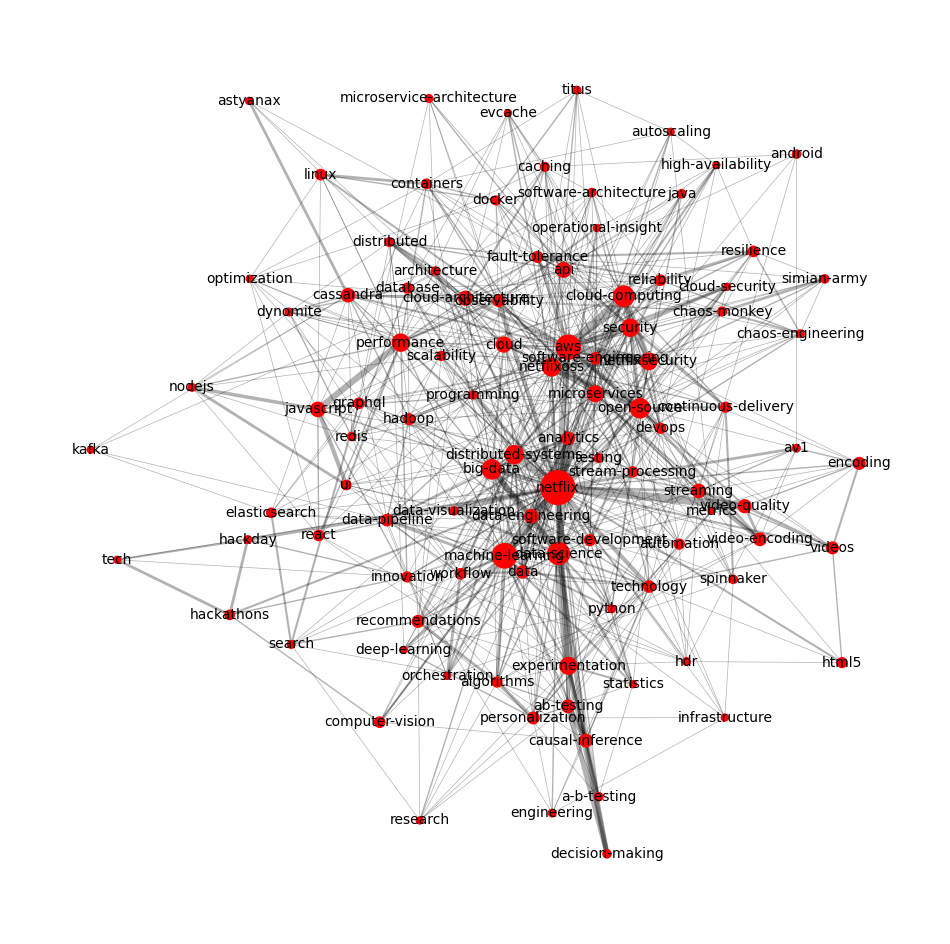

In [60]:
# 確保所有節點都有 freq 屬性
for node in G.nodes:
    if "freq" not in G.nodes[node]:
        # 若該節點不在 nodes 資料表，則設為 0 或該名稱在 df_long 的出現次數
        freq_val = nodes.loc[nodes["name"] == node, "freq"]
        G.nodes[node]["freq"] = int(freq_val.iloc[0]) if len(freq_val) > 0 else 0

# 篩選前 30 熱門節點
top_tags = nodes.head(100)["name"]
subG = G.subgraph(top_tags)

# 🎨 視覺化
plt.figure(figsize=(12, 12))

pos = nx.spring_layout(subG, k=0.4)

# 節點大小與邊寬
sizes = [G.nodes[n]["freq"] * 5 for n in subG.nodes]
weights = [subG[u][v]['weight'] * 0.5 for u, v in subG.edges]

nx.draw_networkx_edges(subG, pos, width=weights, alpha=0.3)
nx.draw_networkx_nodes(subG, pos, node_size=sizes, node_color="red")
nx.draw_networkx_labels(subG, pos, font_size=10, font_color="black")

plt.axis("off")
plt.show()


In [138]:
import pandas as pd
import json

# 假設 df 已有 publish_time 和 tags
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['tags'] = df['tags'].str.split(',')
df = df.explode('tags')
df['tags'] = df['tags'].str.strip()

# 以月為單位
df['year_month'] = df['publish_time'].dt.to_period('M').astype(str)

# 每月每 tag 次數
tag_counts = df.groupby(['year_month','tags']).size().unstack(fill_value=0)

# 累積數量
tag_counts = tag_counts.cumsum()

# 【關鍵改變】為每個時間點找出前10名
result = []
for date in tag_counts.index:
    row_data = tag_counts.loc[date].sort_values(ascending=False).head(10)
    date_dict = {'date': date}
    for tag, value in row_data.items():
        date_dict[tag] = int(value)
    result.append(date_dict)

json_data = result

# 統計所有出現過的 tags（用於輸出訊息）
all_tags_set = set()
for item in result:
    all_tags_set.update([k for k in item.keys() if k != 'date'])

# 生成 HTML
html_content = f"""
<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8">
<title>Bar Chart Race - Dynamic Top 10</title>
<script src="https://d3js.org/d3.v7.min.js"></script>
<style>
body {{
  font-family: Arial, sans-serif;
  padding: 20px;
}}
.axis path, .axis line {{
  fill: none;
  stroke: #000;
  shape-rendering: crispEdges;
}}
.labelName {{
  font-weight: bold;
  text-anchor: end;
}}
.labelValue {{
  font-weight: bold;
}}
#controls {{
  margin: 20px 0;
}}
button {{
  padding: 10px 20px;
  margin-right: 10px;
  font-size: 14px;
  cursor: pointer;
}}
</style>
</head>
<body>
<h2>Bar Chart Race - 動態前10名 Tags</h2>
<div id="controls">
  <button id="playPause">暫停</button>
  <button id="restart">重新開始</button>
  <span id="speedLabel">速度: <span id="speedValue">1.0x</span></span>
  <input type="range" id="speedSlider" min="0.5" max="3" step="0.5" value="1">
</div>
<div id="dateLabel" style="font-size:32px; font-weight:bold; margin-bottom:20px; color:#333;"></div>
<svg width="1000" height="600"></svg>

<script>
const data = {json.dumps(json_data, ensure_ascii=False)};
const svg = d3.select("svg");
const width = +svg.attr("width");
const height = +svg.attr("height");
const margin = {{top:60, right:200, bottom:50, left:200}};

// 收集所有出現過的tags
const allTags = new Set();
data.forEach(d => {{
  Object.keys(d).filter(k => k !== 'date').forEach(tag => allTags.add(tag));
}});

const color = d3.scaleOrdinal()
  .domain([...allTags])
  .range(d3.schemeTableau10.concat(d3.schemePaired));

const x = d3.scaleLinear().range([margin.left, width - margin.right]);
const y = d3.scaleBand().range([margin.top, height - margin.bottom]).padding(0.1);

const xAxisGroup = svg.append("g")
  .attr("class", "axis")
  .attr("transform", `translate(0,${{margin.top - 10}})`);

let index = 0;
let t = 0;
const steps = 30;
let baseDuration = 1500;
let isPlaying = true;
let animationId = null;

// 控制按鈕
d3.select("#playPause").on("click", function() {{
  isPlaying = !isPlaying;
  d3.select(this).text(isPlaying ? "暫停" : "播放");
}});

d3.select("#restart").on("click", function() {{
  index = 0;
  t = 0;
  isPlaying = true;
  d3.select("#playPause").text("暫停");
}});

d3.select("#speedSlider").on("input", function() {{
  const speed = +this.value;
  d3.select("#speedValue").text(speed.toFixed(1) + "x");
  baseDuration = 1500 / speed;
}});

function getTop10Tags(dataPoint) {{
  return Object.keys(dataPoint)
    .filter(k => k !== 'date')
    .map(tag => ({{tag, value: dataPoint[tag] || 0}}))
    .sort((a, b) => b.value - a.value)
    .slice(0, 10);
}}

function interpolate(a, b, alpha) {{
  const result = {{}};
  const allKeys = new Set([...Object.keys(a), ...Object.keys(b)]);
  allKeys.forEach(tag => {{
    if (tag === 'date') return;
    const valA = a[tag] || 0;
    const valB = b[tag] || 0;
    result[tag] = valA + (valB - valA) * alpha;
  }});
  return result;
}}

function step() {{
  if (!isPlaying) {{
    animationId = requestAnimationFrame(step);
    return;
  }}

  const current = data[index];
  const nextIndex = (index + 1) % data.length;
  const next = data[nextIndex];
  const alpha = t / steps;
  
  const frameData = interpolate(current, next, alpha);
  
  const top10 = getTop10Tags(frameData);
  const sortedTags = top10.map(d => d.tag);
  
  y.domain(sortedTags);
  const maxValue = d3.max(top10, d => d.value);
  x.domain([0, maxValue * 1.1]);

  // 更新 x 軸
  xAxisGroup.transition().duration(50).call(d3.axisTop(x).ticks(5));

  // 更新長條
  const bars = svg.selectAll("rect").data(sortedTags, d => d);
  
  bars.enter()
    .append("rect")
    .attr("y", d => y(d))
    .attr("height", y.bandwidth())
    .attr("x", margin.left)
    .attr("width", 0)
    .attr("fill", d => color(d))
    .merge(bars)
    .transition().duration(50)
    .attr("y", d => y(d))
    .attr("height", y.bandwidth())
    .attr("x", margin.left)
    .attr("width", d => Math.max(0, x(frameData[d] || 0) - margin.left));
  
  bars.exit()
    .transition().duration(50)
    .attr("width", 0)
    .remove();

  // 更新標籤名稱（左側）
  const labelsName = svg.selectAll(".labelName").data(sortedTags, d => d);
  
  labelsName.enter()
    .append("text")
    .attr("class", "labelName")
    .attr("x", margin.left - 10)
    .attr("y", d => y(d) + y.bandwidth() / 2)
    .attr("dy", "0.35em")
    .style("font-size", "14px")
    .text(d => d)
    .merge(labelsName)
    .transition().duration(50)
    .attr("y", d => y(d) + y.bandwidth() / 2);
  
  labelsName.exit().remove();

  // 更新數值標籤（右側）
  const labelsValue = svg.selectAll(".labelValue").data(sortedTags, d => d);
  
  labelsValue.enter()
    .append("text")
    .attr("class", "labelValue")
    .attr("x", d => x(frameData[d] || 0) + 10)
    .attr("y", d => y(d) + y.bandwidth() / 2)
    .attr("dy", "0.35em")
    .style("font-size", "14px")
    .text(d => Math.round(frameData[d] || 0))
    .merge(labelsValue)
    .transition().duration(50)
    .attr("x", d => x(frameData[d] || 0) + 10)
    .attr("y", d => y(d) + y.bandwidth() / 2)
    .text(d => Math.round(frameData[d] || 0));
  
  labelsValue.exit().remove();

  // 更新日期顯示
  d3.select("#dateLabel").text(next.date);

  t += 1;
  if (t > steps) {{
    t = 0;
    index = nextIndex;
  }}
  
  animationId = requestAnimationFrame(step);
}}

step();
</script>
</body>
</html>
"""

with open("bar_chart_race_dynamic.html", "w", encoding="utf-8") as f:
    f.write(html_content)

print("✅ bar_chart_race_dynamic.html 已生成！")
print(f"📊 共有 {len(data)} 個時間點")
print(f"🏷️  共有 {len(all_tags_set)} 個不同的 tags")

✅ bar_chart_race_dynamic.html 已生成！
📊 共有 4 個時間點
🏷️  共有 36 個不同的 tags


In [132]:
""""
    t += 1;
    if(t > steps){{
        t = 0;
        if(index < data.length - 1){{
            index += 1;
            requestAnimationFrame(step);
        }}
        // 播放到最後一筆就停止
    }} else {{
        requestAnimationFrame(step);
    }}
}}
""""

SyntaxError: incomplete input (3303912174.py, line 1)